In [ ]:
# OR 데이터 구축
x=[[0.0,0.0,0.0],[0.0,0.0,1.0],[0.0,1.0,0.0],[0.0,1.0,1.0],[1.0,0.0,0.0],[1.0,0.0,1.0],[1.0,1.0,0.0],[1.0,1.0,1.0]]
y=[[-1],[1],[-1],[-1],[-1],[-1],[1],[-1]]

In [ ]:
# 다층 퍼셉트론
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
n_input = 3
n_output = 1
n_hidden1 = 2

model = Sequential()
model.add(Dense(units=n_hidden1, activation='tanh', input_shape=(n_input,)))
model.add(Dense(units=n_output, activation='tanh'))

model.compile(loss='mse',optimizer=Adam(learning_rate=0.01),metrics=['mse'])
model.fit(x,y,epochs=500, verbose=0)

res = model.predict(x)
print(res)
print(tf.sign(res))

1/1 [==============================] - 0s 92ms/step
[[-0.99779415]
 [-0.54597586]
 [-0.8840457 ]
 [-0.5160092 ]
 [-0.8840434 ]
 [-0.5200017 ]
 [ 0.79525304]
 [-0.48260036]]
tf.Tensor(
[[-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]], shape=(8, 1), dtype=float32)


In [ ]:
# 히든레이어 == 자동 특징 추출기

# 컨볼루션 : 필터로 특징을 뽑아주는 컨볼루션
# 풀링 : 사소한 변화를 무시해주는 레이어 ( 크기를 줄여주는)

# 플래튼 : 영상을 일차원으로 바꿔준다. -> dence 연결


#c-p-c-p-c-fc-fc 구조

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.optimizers import Adam
# MNIST 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)= mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)
# LeNet-5 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(6,(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(16,(5,5),padding='same',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(120,(5,5),padding='same',activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(84,activation='relu'))
cnn.add(Dense(10,activation='softmax'))

cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

Epoch 1/30
469/469 - 69s - loss: 0.2200 - accuracy: 0.9307 - val_loss: 0.0531 - val_accuracy: 0.9828 - 69s/epoch - 148ms/step
Epoch 2/30
469/469 - 70s - loss: 0.0529 - accuracy: 0.9837 - val_loss: 0.0365 - val_accuracy: 0.9877 - 70s/epoch - 149ms/step
Epoch 3/30
469/469 - 70s - loss: 0.0369 - accuracy: 0.9888 - val_loss: 0.0316 - val_accuracy: 0.9893 - 70s/epoch - 150ms/step
Epoch 4/30
469/469 - 70s - loss: 0.0277 - accuracy: 0.9912 - val_loss: 0.0325 - val_accuracy: 0.9894 - 70s/epoch - 150ms/step
Epoch 5/30
469/469 - 69s - loss: 0.0211 - accuracy: 0.9935 - val_loss: 0.0330 - val_accuracy: 0.9895 - 69s/epoch - 147ms/step
Epoch 6/30
469/469 - 70s - loss: 0.0182 - accuracy: 0.9942 - val_loss: 0.0311 - val_accuracy: 0.9902 - 70s/epoch - 150ms/step
Epoch 7/30
469/469 - 70s - loss: 0.0159 - accuracy: 0.9948 - val_loss: 0.0300 - val_accuracy: 0.9908 - 70s/epoch - 150ms/step
Epoch 8/30
469/469 - 68s - loss: 0.0130 - accuracy: 0.9956 - val_loss: 0.0352 - val_accuracy: 0.9894 - 68s/epoch - 146

In [ ]:
# 규제 기법 dropout

# 일정 비율의 가중치를 임의로 선택하여 불능으로 만들고 학습하는 규제 기법
# 불능이 될 에지는 샘플마다 독립적으로 정하는데 난수를 이용하여 랜덤하게 선택


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
# MNIST 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)= mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(128,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))
cnn.save("mytest.h5") #HDF5형식의 파일로 저장.
# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=12,validation_data=(x_test,y_test),verbose=2)

res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

Epoch 1/12
469/469 - 162s - loss: 0.2246 - accuracy: 0.9308 - val_loss: 0.0546 - val_accuracy: 0.9809 - 162s/epoch - 345ms/step
Epoch 2/12
469/469 - 165s - loss: 0.0832 - accuracy: 0.9749 - val_loss: 0.0342 - val_accuracy: 0.9882 - 165s/epoch - 352ms/step
Epoch 3/12
469/469 - 161s - loss: 0.0613 - accuracy: 0.9812 - val_loss: 0.0326 - val_accuracy: 0.9888 - 161s/epoch - 344ms/step
Epoch 4/12
469/469 - 159s - loss: 0.0507 - accuracy: 0.9847 - val_loss: 0.0305 - val_accuracy: 0.9901 - 159s/epoch - 339ms/step
Epoch 5/12
469/469 - 157s - loss: 0.0450 - accuracy: 0.9860 - val_loss: 0.0323 - val_accuracy: 0.9899 - 157s/epoch - 336ms/step
Epoch 6/12
469/469 - 157s - loss: 0.0381 - accuracy: 0.9878 - val_loss: 0.0277 - val_accuracy: 0.9921 - 157s/epoch - 335ms/step
Epoch 7/12
469/469 - 159s - loss: 0.0347 - accuracy: 0.9890 - val_loss: 0.0297 - val_accuracy: 0.9912 - 159s/epoch - 338ms/step
Epoch 8/12
469/469 - 158s - loss: 0.0295 - accuracy: 0.9904 - val_loss: 0.0307 - val_accuracy: 0.9905 - 

In [ ]:
from tensorflow.keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))


Epoch 1/30
391/391 - 189s - loss: 1.6235 - accuracy: 0.4029 - val_loss: 1.2648 - val_accuracy: 0.5429 - 189s/epoch - 484ms/step
Epoch 2/30
391/391 - 187s - loss: 1.2433 - accuracy: 0.5565 - val_loss: 1.0566 - val_accuracy: 0.6264 - 187s/epoch - 478ms/step
Epoch 3/30
391/391 - 185s - loss: 1.0862 - accuracy: 0.6167 - val_loss: 0.9633 - val_accuracy: 0.6589 - 185s/epoch - 473ms/step
Epoch 4/30
391/391 - 184s - loss: 0.9609 - accuracy: 0.6610 - val_loss: 0.8763 - val_accuracy: 0.6949 - 184s/epoch - 470ms/step
Epoch 5/30
391/391 - 187s - loss: 0.8888 - accuracy: 0.6877 - val_loss: 0.8233 - val_accuracy: 0.7113 - 187s/epoch - 479ms/step
Epoch 6/30
391/391 - 187s - loss: 0.8268 - accuracy: 0.7108 - val_loss: 0.7846 - val_accuracy: 0.7290 - 187s/epoch - 478ms/step
Epoch 7/30
391/391 - 186s - loss: 0.7717 - accuracy: 0.7271 - val_loss: 0.7182 - val_accuracy: 0.7534 - 186s/epoch - 475ms/step
Epoch 8/30
391/391 - 187s - loss: 0.7345 - accuracy: 0.7416 - val_loss: 0.7150 - val_accuracy: 0.7518 - 

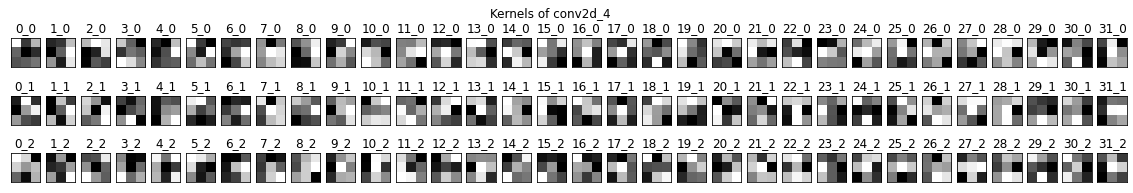

conv2d_34 (None, 30, 30, 32)
conv2d_35 (None, 28, 28, 32)
conv2d_36 (None, 12, 12, 64)
conv2d_37 (None, 10, 10, 64)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34_input (InputLayer  [(None, 32, 32, 3)]      0         
 )                                                               
                                                                 
 conv2d_34 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 3s 8ms/step


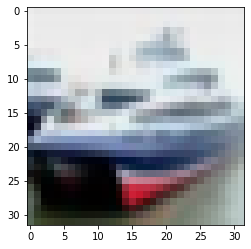

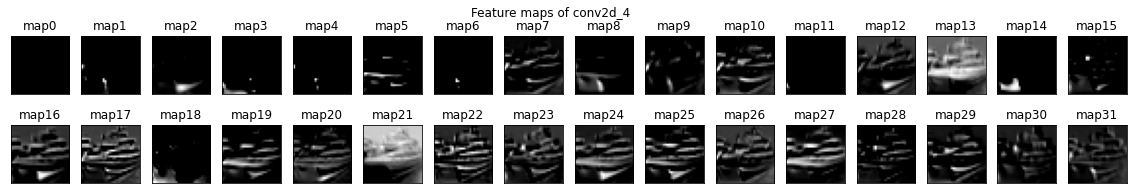

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)
# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))
# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

cnn.summary() # cnn 모델의 정보 출력
for layer in cnn.layers: # 컨볼루션층의 커널을 시각화
    if 'conv' in layer.name:
        kernel,biases=layer.get_weights()
        print(layer.name,kernel.shape) # 커널의 텐서 모양을 출력
        kernel,biases=cnn.layers[0].get_weights() # 층 0의 커널 정보를 저장
minv,maxv=kernel.min(),kernel.max()
kernel=(kernel-minv)/(maxv-minv)
n_kernel=32
import matplotlib.pyplot as plt

plt.figure(figsize=(20,3))
plt.suptitle("Kernels of conv2d_4")
for i in range(n_kernel): # i번째 커널
    f=kernel[:,:,:,i]
    for j in range(3): # j번째 채널
        plt.subplot(3,n_kernel,j*n_kernel+i+1)
        plt.imshow(f[:,:,j],cmap='gray')
        plt.xticks([]); plt.yticks([])
        plt.title(str(i)+'_'+str(j))
plt.show()

for layer in cnn.layers: # 컨볼루션층의 특징 맵을 시각화
    if 'conv' in layer.name:
        print(layer.name,layer.output.shape) # 특징 맵의 텐서 모양을 출력
        
from tensorflow.keras.models import Model

partial_model=Model(inputs=cnn.inputs,outputs=cnn.layers[0].output) # 층 0만 떼어냄
partial_model.summary()

feature_map=partial_model.predict(x_test) # 부분 모델로 테스트 집합을 예측
fm=feature_map[1] # 1번 영상의 특징 맵을 시각화

plt.imshow(x_test[1]) # 1번 영상을 출력
plt.figure(figsize=(20,3))
plt.suptitle("Feature maps of conv2d_4")
for i in range(32): # i번째 특징 맵
    plt.subplot(2,16,i+1)
    plt.imshow(fm[:,:,i],cmap='gray')
    plt.xticks([]); plt.yticks([])
    plt.title("map"+str(i))
plt.show()


170498071/170498071 [==============================] - 6s 0us/step
Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


391/391 - 38s - loss: 1.7397 - accuracy: 0.3535 - val_loss: 1.4497 - val_accuracy: 0.4710 - 38s/epoch - 97ms/step
Epoch 2/50
391/391 - 25s - loss: 1.3869 - accuracy: 0.4969 - val_loss: 1.1762 - val_accuracy: 0.5731 - 25s/epoch - 65ms/step
Epoch 3/50
391/391 - 25s - loss: 1.2474 - accuracy: 0.5520 - val_loss: 1.0376 - val_accuracy: 0.6315 - 25s/epoch - 64ms/step
Epoch 4/50
391/391 - 25s - loss: 1.1420 - accuracy: 0.5956 - val_loss: 0.9912 - val_accuracy: 0.6485 - 25s/epoch - 64ms/step
Epoch 5/50
391/391 - 25s - loss: 1.0793 - accuracy: 0.6179 - val_loss: 0.9083 - val_accuracy: 0.6868 - 25s/epoch - 63ms/step
Epoch 6/50
391/391 - 24s - loss: 1.0315 - accuracy: 0.6351 - val_loss: 0.9151 - val_accuracy: 0.6797 - 24s/epoch - 62ms/step
Epoch 7/50
391/391 - 26s - loss: 0.9854 - accuracy: 0.6521 - val_loss: 0.8614 - val_accuracy: 0.7021 - 26s/epoch - 67ms/step
Epoch 8/50
391/391 - 25s - loss: 0.9511 - accuracy: 0.6663 - val_loss: 0.8382 - val_accuracy: 0.7072 - 25s/epoch - 63ms/step
Epoch 9/50


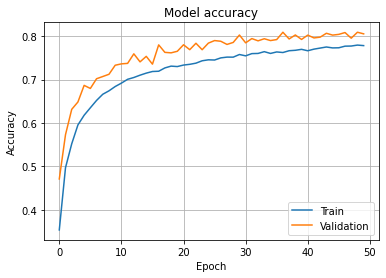

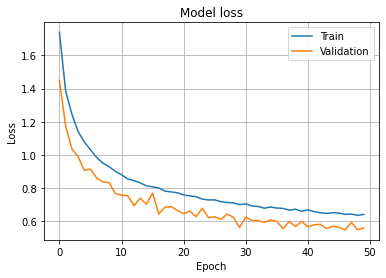

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습(영상 증대기 활용)
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
batch_siz=128
generator=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
hist=cnn.fit_generator(generator.flow(x_train,y_train,batch_size=batch_siz),epochs=50,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

In [ ]:
#전이 학습의 원리

#c언어에 능숙한 학생은 파이썬을 금방 배움(딥러닝에도 같은 원리가 적용됨)
# 자연 영상으로 학습한 신경망을 새나 개의 종을 분류하거나 자율주행에서 차선과 보행자 인식에 사용.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
